In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Import Data

In [2]:
with open('X', 'rb') as outfile:
    X = pickle.load(outfile)
with open('Y', 'rb') as outfile:
    Y = pickle.load(outfile)

#### Understanding Data Layout

In [3]:
print("No.of elements in X: " + str(len(X)))
print("No.of elements in Y: " + str(len(Y)),'\n')
print("No.of arrays in each X: "+str(len(X[0])))

No.of elements in X: 6316
No.of elements in Y: 6316 

No.of arrays in each X: 6


In [4]:
print("No.of records for each distinct value in Y: \n"+str(pd.Series(Y).value_counts()))

No.of records for each distinct value in Y: 
1    3217
0    3099
dtype: int64


In [5]:
for i in range(len(X)):
    print(len(X[i][0]))
    if i==2:
        break

229
101
128


In [6]:
len_of_different_arrays =[]
for i in range(len(X)):
    len_of_different_arrays.append(len(X[i][0]))

print('Minimum no.of elements in an array: '+str(min(len_of_different_arrays)))
print('Maximum no.of elements in an array: '+str(max(len_of_different_arrays)))

Minimum no.of elements in an array: 14
Maximum no.of elements in an array: 514


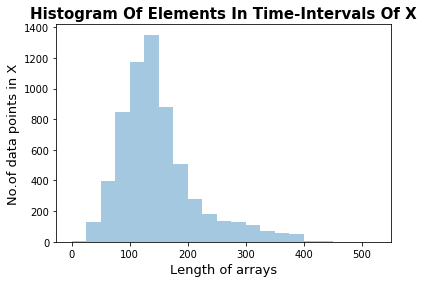

In [38]:
bins = np.arange(0, 550, 25)
plt.hist(len_of_different_arrays,bins=bins,  alpha=0.4)

plt.xlabel('Length of arrays', fontsize=13)
plt.ylabel('No.of data points in X', fontsize=13)
plt.title('Histogram Of Elements In Time-Intervals Of X', fontsize = 15 ,fontweight='bold')
plt.show()

#### To Quickly Plot Charts Of One Time Interval (One Data Point)

In [8]:
def plot_one_datapoint(data,label):
    ax1 = plt.subplot(211)
    data = np.array(data)
    plt.plot(data[0,:], label = 'axe x')
    plt.plot(data[1,:], label = 'axe y')
    plt.plot(data[2,:], label = 'axe z')
    plt.legend()
    plt.title('Accelerometer')
    ax2 = plt.subplot(212, sharex = ax1)
    plt.plot(data[3,:], label = 'axe x')
    plt.plot(data[4,:], label = 'axe y')
    plt.plot(data[5,:], label = 'axe z')
    plt.legend()
    plt.title('Gyrometer')
    plt.show()

#### Plotting Accelerometer And Gyrometer Readings Of 4 Time Intervals (Randomly Choosen Points)

Interval label: 0


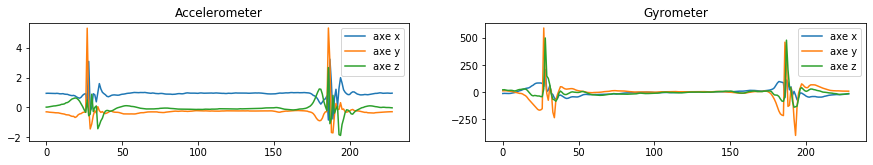

Interval label: 0


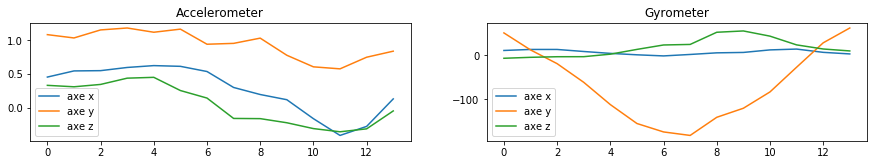

Interval label: 1


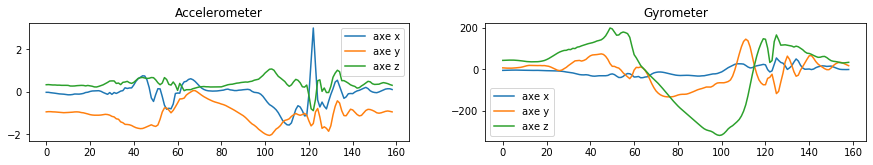

Interval label: 0


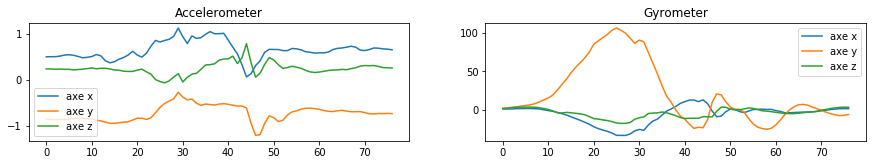

In [9]:
for i,val in enumerate([0,2587,80,6292]):
    print("Interval label: "+str(Y[val]))
    data = X[val]
    fig, ax = plt.subplots(figsize=(15,10))
    ax1 = plt.subplot(4,2,2*i+1)
    plt.plot(data[0,:], label = 'axe x')
    plt.plot(data[1,:], label = 'axe y')
    plt.plot(data[2,:], label = 'axe z')
    plt.legend()
    plt.title('Accelerometer')
    ax2 = plt.subplot(4,2,2*i+2, sharex = ax1)
    plt.plot(data[3,:], label = 'axe x')
    plt.plot(data[4,:], label = 'axe y')
    plt.plot(data[5,:], label = 'axe z')
    plt.legend()
    plt.title('Gyrometer')
    plt.show()

#### Get 100 Values From Each Of 6 Numpy Arrays. Hence, We Feed 600 Features For Every Interval

In [10]:
# Followig definition incorporates the logic discussed above

def get_percentile_data(array):
    n = len(array)

    indices = []
    for i in range(1,101):
        indices.append(int((n-1)*i/100))
    indices = np.unique(indices)
    c_indices = len(indices)

    if c_indices < 100:
        random = np.random.randint(c_indices-1,size=(100-c_indices))
        indices = np.concatenate((indices,random),axis = None)

    new_array = array[indices]
    return(new_array)

In [11]:
# generate the train_x data
train_x = []
for i in range(len(X)):
    recordings = len(X[i][0])
    a_x = get_percentile_data(X[i][0])
    a_y = get_percentile_data(X[i][1])
    a_z = get_percentile_data(X[i][2])
    g_x = get_percentile_data(X[i][3])
    g_y = get_percentile_data(X[i][4])
    g_z = get_percentile_data(X[i][5])
    train_x.append([a_x,a_y,a_z,g_x,g_y,g_z])

In [12]:
# Checkpoint: All data points are in a list. Each data point is list of 6 numpy arrays. 
# We check if all these arrays have 100 elements across all data points

y =[]
for i in range(len(train_x)):
    y.append(len(train_x[i][0]))
print(len(y))
print(max(y))
print(min(y))

6316
100
100


Interval label: 0


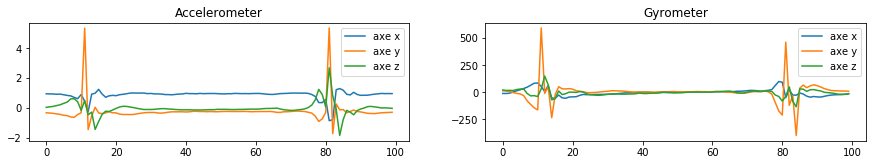

Interval label: 0


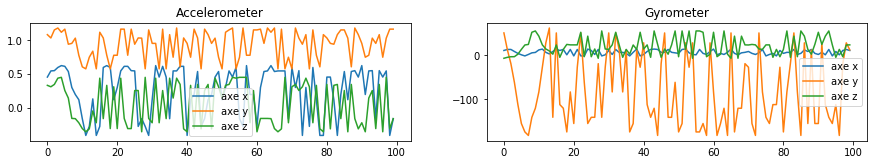

Interval label: 1


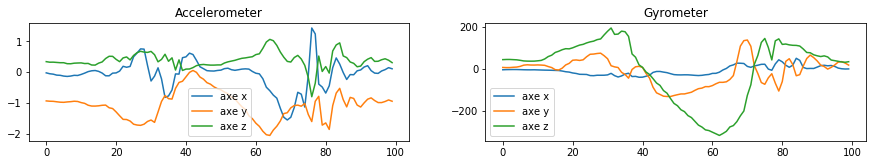

Interval label: 0


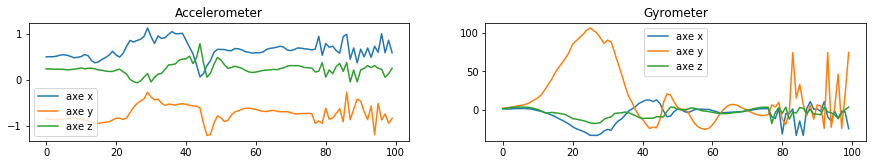

In [13]:
for i,val in enumerate([0,2587,80,6292]):
    print("Interval label: "+str(Y[val]))
    data = np.array(train_x[val])
    fig, ax = plt.subplots(figsize=(15,10))
    ax1 = plt.subplot(4,2,2*i+1)
    plt.plot(data[0,:], label = 'axe x')
    plt.plot(data[1,:], label = 'axe y')
    plt.plot(data[2,:], label = 'axe z')
    plt.legend()
    plt.title('Accelerometer')
    ax2 = plt.subplot(4,2,2*i+2, sharex = ax1)
    plt.plot(data[3,:], label = 'axe x')
    plt.plot(data[4,:], label = 'axe y')
    plt.plot(data[5,:], label = 'axe z')
    plt.legend()
    plt.title('Gyrometer')
    plt.show()

In [14]:
# generate new data such that it saves the shape of the graph

def extrapolate_array(p,elem=100):
    
    n = len(p)
    indices = []
    
    for i in range(1,101):
        indices.append(int((n-1)*i/100))
    indices = np.unique(indices)
    c_indices = len(indices)
    
    if c_indices >= 100:
        return(p[indices])
        
    else:
        have = len(p) #5 given points in array
        req = elem - have #95 points to be added
        points_bw = int(req/(have-1)) #23 points added between each 2 data points
        extras = elem - (points_bw*(have-1)+have) #3 points added at the end

        new = np.zeros((elem))

        for i in range(len(p)):
            new[(points_bw+1)*i] = p[i]

        for i in range((points_bw+1)*(len(p)-1)+1,elem):
            new[i] = p[len(p)-1]

        for i in range(len(p)-1):
            for j in range((points_bw+1)*i+1,(points_bw+1)*i+1+(points_bw-1)+1):
                a = new[(points_bw+1)*i]
                b = new[(points_bw+1)*(i+1)]
                new[j] = ((b-a)/(points_bw+1))*(j-(points_bw+1)*i) +a
    return(new)

In [15]:
# generate the train_x data
train_x = []
train_x2 = []
for i in range(len(X)):
    recordings = len(X[i][0])
    a_x = extrapolate_array(X[i][0])
    a_y = extrapolate_array(X[i][1])
    a_z = extrapolate_array(X[i][2])
    g_x = extrapolate_array(X[i][3])
    g_y = extrapolate_array(X[i][4])
    g_z = extrapolate_array(X[i][5])
    train_x.append([a_x,a_y,a_z,g_x,g_y,g_z])
    train_x2.append(np.concatenate([a_x,a_y,a_z,g_x,g_y,g_z]))

In [16]:
# Checkpoint: All data points are in a list. Each data point is list of 6 numpy arrays. 
# We check if all these arrays have 100 elements across all data points

y =[]
for i in range(len(train_x)):
    y.append(len(train_x[i][0]))
print(len(y))
print(max(y))
print(min(y))

6316
100
100


Interval label: 0


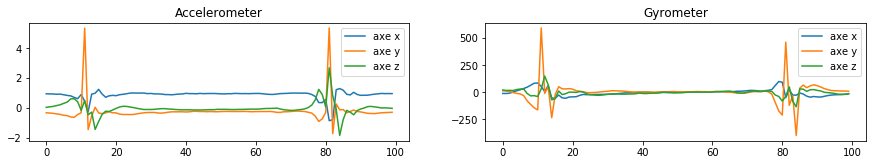

Interval label: 0


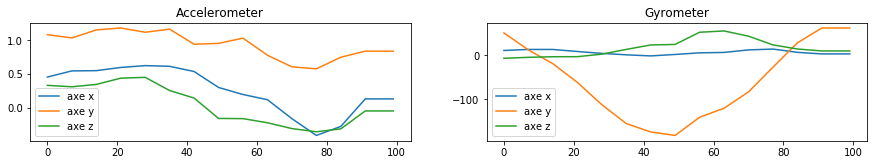

Interval label: 1


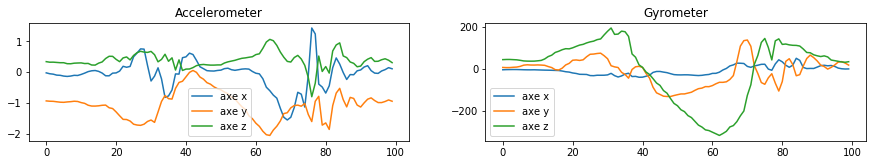

Interval label: 0


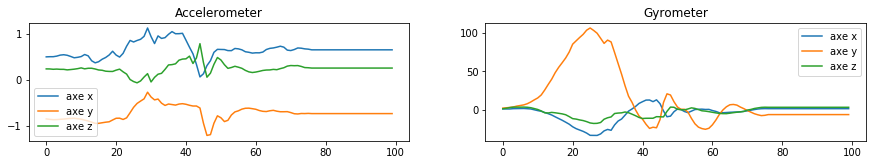

In [17]:
for i,val in enumerate([0,2587,80,6292]):
    print("Interval label: "+str(Y[val]))
    data = np.array(train_x[val])
    fig, ax = plt.subplots(figsize=(15,10))
    ax1 = plt.subplot(4,2,2*i+1)
    plt.plot(data[0,:], label = 'axe x')
    plt.plot(data[1,:], label = 'axe y')
    plt.plot(data[2,:], label = 'axe z')
    plt.legend()
    plt.title('Accelerometer')
    ax2 = plt.subplot(4,2,2*i+2, sharex = ax1)
    plt.plot(data[3,:], label = 'axe x')
    plt.plot(data[4,:], label = 'axe y')
    plt.plot(data[5,:], label = 'axe z')
    plt.legend()
    plt.title('Gyrometer')
    plt.show()

### Building Neural Network

In [18]:
# cross checks
print(train_x2[0][[0,1,2, 597,598,599]])
print(train_x[0][0][[0,1,2]])
print(train_x[0][5][[97,98,99]])

[  0.937975     0.92691684   0.92645182 -19.17675521 -18.45669101
 -12.92903187]
[0.937975   0.92691684 0.92645182]
[-19.17675521 -18.45669101 -12.92903187]


In [19]:
x1 = pd.DataFrame({'all_values':train_x2})
print(x1.shape)
x1.head()

(6316, 1)


,all_values
0,"[0.9379749979760639, 0.9269168405488201, 0.926..."
1,"[0.942153583804798, 0.9379749979760639, 0.9304..."
2,"[0.9637882583067392, 0.9533251929776123, 0.944..."
3,"[0.9668898934574748, 0.9608090573597785, 0.954..."
4,"[0.9668898934574748, 0.9608090573597785, 0.954..."


#### First 5 Data Points In X And Y

In [20]:
x2=x1
x2[np.arange(1,601)] = pd.DataFrame(x2.all_values.values.tolist(), index= x1.index)
x2 = x2.iloc[:,1:]

print(x2.shape)
x2.head()

(6316, 600)


,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,0.937975,0.926917,0.926452,0.903788,0.914840,0.872308,0.828885,0.798250,0.694161,0.609565,...,16.490991,10.969492,-0.368858,-4.199489,-7.129304,-11.718483,-18.528881,-19.176755,-18.456691,-12.929032
1,0.942154,0.937975,0.930443,0.926917,0.923953,0.926452,0.936885,0.925488,0.903788,0.904507,...,-8.856893,-10.422603,-11.493314,-12.596972,-12.791229,-12.193483,-11.386688,-10.236517,-9.510532,-9.393744
2,0.963788,0.953325,0.944541,0.950071,0.954319,0.959632,0.957040,0.957446,0.962745,0.955880,...,-7.129304,-8.736104,-12.880386,-14.339615,-18.528881,-20.156790,-18.941816,-18.456691,-16.541513,-12.929032
3,0.966890,0.960809,0.954728,0.956272,0.957817,0.956416,0.955015,0.958009,0.961003,0.960169,...,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027,-21.542027
4,0.966890,0.960809,0.954728,0.956272,0.957817,0.956416,0.955015,0.958009,0.961003,0.960169,...,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692,-32.920692


In [21]:
y = Y
y[0:5]

[0, 0, 0, 0, 0]

#### Split Data Into Train And Test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state = 0)

print("Number of training intervals: "+str(len(X_train)))
print("Number of testing intervals: "+str(len(X_test)))

Number of training intervals: 5052
Number of testing intervals: 1264


#### Standardize Data

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1

reg = l1(0.0001)

# Initialising the ANN
classifier = Sequential()

# Build the layers
classifier.add(Dense(output_dim=512, init='uniform', activation='relu', input_dim=600))
classifier.add(Dropout(p=0.2))

classifier.add(Dense(output_dim=256, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.2))

classifier.add(Dense(output_dim=128, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.2))

classifier.add(Dense(output_dim=64, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.2))

classifier.add(Dense(output_dim=32, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.2))

classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p=0.2))

# Output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150) 

Using TensorFlow backend.
/Users/taneja/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/taneja/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/taneja/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/taneja/.local/lib/python3.7/site-packages/tensorflow/py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/taneja/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
/Users/taneja/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/Users/taneja/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
/Users/taneja/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
/Users/taneja/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/Users/taneja/Anaconda3


Epoch 1/150
5052/5052 [==============================] - 1s 168us/step - loss: 0.6004 - accuracy: 0.6605
Epoch 2/150
5052/5052 [==============================] - 0s 84us/step - loss: 0.3296 - accuracy: 0.8705
Epoch 3/150
5052/5052 [==============================] - 0s 81us/step - loss: 0.2516 - accuracy: 0.9016
Epoch 4/150
5052/5052 [==============================] - 0s 81us/step - loss: 0.2090 - accuracy: 0.9242
Epoch 5/150
5052/5052 [==============================] - 0s 83us/step - loss: 0.1735 - accuracy: 0.9371
Epoch 6/150
5052/5052 [==============================] - 0s 81us/step - loss: 0.1472 - accuracy: 0.9428
Epoch 7/150
5052/5052 [==============================] - 0s 80us/step - loss: 0.1309 - accuracy: 0.9511
Epoch 8/150
5052/5052 [==============================] - 0s 75us/step - loss: 0.1119 - accuracy: 0.9576
Epoch 9/150
5052/5052 [==============================] - 0s 75us/step - loss: 0.1018 - accuracy: 0.9602
Epoch 10/150
5052/5052 [==============================] - 0s 7

Epoch 77/150
5052/5052 [==============================] - 0s 74us/step - loss: 0.0115 - accuracy: 0.9968
Epoch 78/150
5052/5052 [==============================] - 0s 74us/step - loss: 0.0086 - accuracy: 0.9976
Epoch 79/150
5052/5052 [==============================] - 0s 82us/step - loss: 0.0174 - accuracy: 0.9976
Epoch 80/150
5052/5052 [==============================] - 0s 81us/step - loss: 0.0140 - accuracy: 0.9960
Epoch 81/150
5052/5052 [==============================] - 0s 71us/step - loss: 0.0149 - accuracy: 0.9947
Epoch 82/150
5052/5052 [==============================] - 0s 70us/step - loss: 0.0190 - accuracy: 0.9962
Epoch 83/150
5052/5052 [==============================] - 0s 72us/step - loss: 0.0094 - accuracy: 0.9976
Epoch 84/150
5052/5052 [==============================] - 0s 73us/step - loss: 0.0120 - accuracy: 0.9966
Epoch 85/150
5052/5052 [==============================] - 0s 72us/step - loss: 0.0133 - accuracy: 0.9974
Epoch 86/150
5052/5052 [==============================]

In [25]:
# Predicting on test data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# predicting on train data
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

[[592  41]
 [ 49 582]]
[[2466    0]
 [   0 2586]]


In [27]:
print("Accuracy on test data is %6.1f" % (((cm[0][0] + cm[1][1])/len(y_test))*100) +"%")
print("Accuracy on train data is %6.1f" % (((cm_train[0][0] + cm_train[1][1])/len(y_train))*100) +"%")

Accuracy on test data is   92.9%
Accuracy on train data is  100.0%


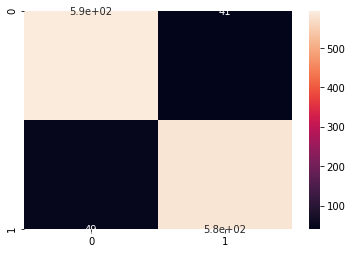

In [28]:
import seaborn as sns
sns.heatmap(cm,annot=True)